In [58]:
from EQL.model import EQL
EQLmodel = EQL(num_layers = 1)
EQLmodel.build_and_compile_model()

# Generating Data, Simple Sine

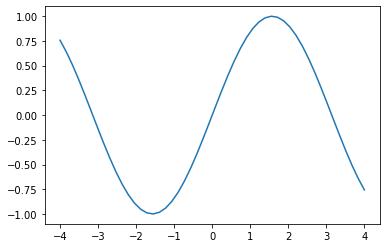

In [28]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-4,4)
y = np.sin(x)
plt.plot(x, y)

# Check proper behavior for ground truth weights

In [61]:
EQLmodel.get_weights(2)

[array([[ 0.03142048],
        [-0.05374764],
        [ 0.01426858],
        [ 0.09591132],
        [ 0.0152718 ]], dtype=float32), array([-0.08834924], dtype=float32)]

In [49]:
#Generating proper weights
w1 = EQLmodel.model.layers[1].get_weights()
w1[0] = np.array([[0, 1, 0, 0, 0, 0]])
w1[1] = np.array([0,0,0,0,0,0])

w2 = EQLmodel.model.layers[2].get_weights()
w2[0] = np.array([[0],[1],[0],[0],[0]])
w2[1] = np.array([0])

In [50]:
#Setting weights
EQLmodel.set_weights(1, w1)    
EQLmodel.set_weights(2, w2)    

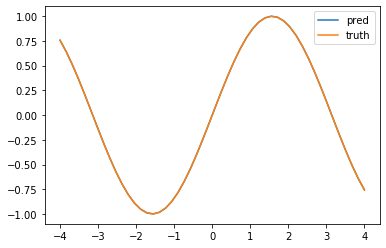

In [51]:
#Visualizing
y_pred = EQLmodel.predict(x)
plt.plot(x, y_pred)
plt.plot(x, y)
plt.legend(['pred','truth'])
plt.show()

### Does indeed work as expected!

# Training and Testing

In [96]:
EQLmodel.build_and_compile_model() #Recompiling models to reset weights
EQLmodel.get_weights(1)

[array([[ 0.06272415,  0.03217024,  0.02024911,  0.0879875 ,  0.05027946,
         -0.05530402]], dtype=float32),
 array([ 0.12010524,  0.01745843, -0.01926479,  0.00640066, -0.06506202,
         0.00367148], dtype=float32)]

In [97]:
EQLmodel.fit(x, y, 0.1, t0 = 6000, t1 = 2000, t2 = 2000, atol = 0.001)
EQLmodel.summary()

Model: "functional_85"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_43 (InputLayer)        [(None, 1)]               0         
_________________________________________________________________
eql_layer_42 (EqlLayer)      (None, 5)                 12        
_________________________________________________________________
dense_layer_42 (DenseLayer)  (None, 1)                 6         
Total params: 18
Trainable params: 18
Non-trainable params: 0
_________________________________________________________________


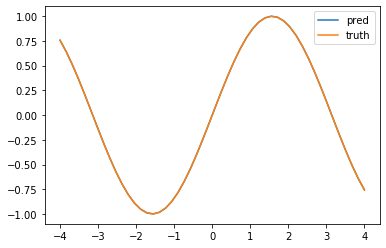

In [98]:
y_pred = EQLmodel.predict(x)
plt.plot(x, y_pred)
plt.plot(x, y)
plt.legend(['pred','truth'])
plt.show()

### Extrapolation:

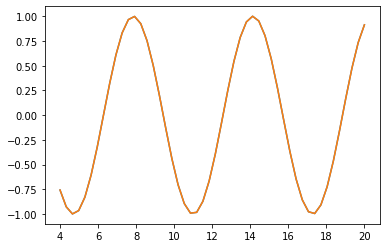

2/2 [==============================] - 0s 4ms/step - loss: 5.6443e-14


5.644329066092045e-14

In [99]:
x_test=np.linspace(4,20)
y_test=np.sin(x_test)
y_pred = EQLmodel.predict(x_test)
plt.plot(x_test, y_pred)
plt.plot(x_test, y_test)
plt.show()
EQLmodel.evaluate(x_test,y_test)

In [100]:
EQLmodel.get_weights(1) #Same weights as ground truth!

[array([[0., 1., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0.], dtype=float32)]

In [101]:
EQLmodel.get_weights(2) #Same weights as ground truth!

[array([[0.],
        [1.],
        [0.],
        [0.],
        [0.]], dtype=float32), array([0.], dtype=float32)]

In [102]:
EQLmodel.model.layers[1].mask

ListWrapper([ListWrapper([array([[0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])]), array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])])

### We see that we are able to learn the sin(x) function perfectly with proper regularization and sufficient epochs for each phase as demonstrated in the paper! This is just the most basic example provided, but the paper also presents more complex functions which are also demonstrated to be learned properly. See the reference in pip/github "README.md" for more information.